# Detección de objetos con cvlib

In [8]:
import cv2
import cvlib as cv
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]    # incrementar tamaño de plots

def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

def draw_faces(img, faces):
    img2 = img.copy()
    for x0, y0, x1, y1 in faces:
        print(cv.detect_gender(img2[y0:y1, x0:x1]))
        cv2.rectangle(img2, (x0, y0), (x1, y1), (0, 255, 0), 3)

    return img2


## Detección de rostros y género

(['male', 'female'], array([0.99616385, 0.00383613], dtype=float32))
(['male', 'female'], array([0.6216996 , 0.37830043], dtype=float32))
<class 'numpy.ndarray'> uint8 [189 162  75]
<class 'numpy.ndarray'> uint8 [189 162  75]


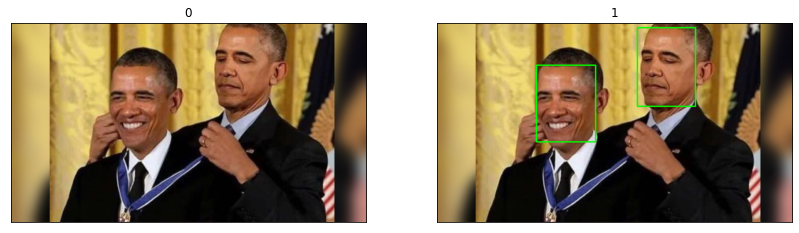

In [9]:
img = image.load_img("../object_detection/obama2.jpg")

x = image.img_to_array(img, dtype=np.uint8)

faces, confidences = cv.detect_face(x)
display_color_row(x,draw_faces(x, faces))

## Detección de objetos


<class 'numpy.ndarray'> uint8 [31 26 22]
<class 'numpy.ndarray'> uint8 [31 26 22]


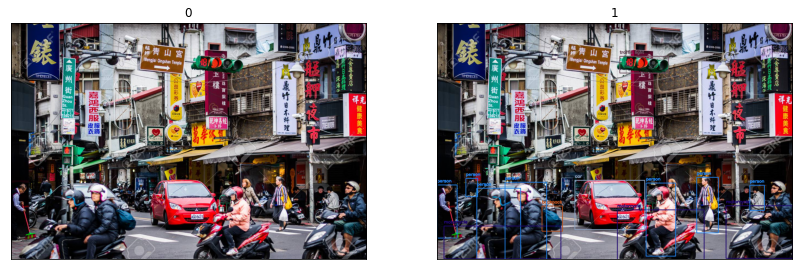

In [10]:
from cvlib.object_detection import draw_bbox

img = image.load_img("street.jpg")

x = image.img_to_array(img, dtype=np.uint8)
bbox, label, conf = cv.detect_common_objects(x)

display_color_row(x, draw_bbox(x.copy(), bbox, label, conf))